# Treinamento de rede Convulacional para classificação de imagens de números

Este código constrói, treina e avalia uma CNN no dataset MNIST, esperando-se que alcance uma acurácia de mais de 95% no conjunto de treino após 3 épocas.

## Importação de Bibliotecas

- tensorflow: É a biblioteca de aprendizado de máquina que usamos para construir e treinar o modelo.
- datasets, layers, models: São submódulos do TensorFlow. datasets é usado para carregar datasets pré-existentes, layers fornece as camadas que serão usadas na rede neural, e models é usado para definir e compilar o modelo.

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

## Carregamento e Preparação do Dataset MNIST

Carrega o dataset MNIST, que contém imagens de dígitos escritos à mão. O dataset é dividido em conjuntos de treinamento (train_images, train_labels) e teste (test_images, test_labels).

In [15]:
# Carregar o dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

Normaliza as imagens dividindo os valores dos pixels por 255. Isso transforma os valores de pixel para o intervalo de 0 a 1, o que é mais eficiente para o treinamento da rede neural.

In [16]:
# Normalizar os dados de imagem
train_images, test_images = train_images / 255.0, test_images / 255.0

Redimensiona as imagens para adicionar um canal extra. Originalmente, as imagens do MNIST são 28x28 pixels. Aqui, elas são redimensionadas para terem um canal extra, indicando que são imagens em escala de cinza (1 canal).

In [17]:
# Redimensionar as imagens para adicionar um canal extra (escala de cinza)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

- models.Sequential: Define o modelo como uma sequência de camadas.
- layers.Conv2D: São camadas convolucionais que extraem características das imagens. 32 e 64 são o número de filtros. (3, 3) é o tamanho do kernel.
- layers.MaxPooling2D: Reduz a dimensionalidade espacial (tamanho) das imagens após a convolução, o que ajuda a reduzir o número de parâmetros e a computação na rede.
- layers.Flatten: Transforma os mapas de características 2D resultantes em um vetor 1D.
- layers.Dense: São camadas densamente conectadas (tradicionais de redes neurais). 64 é o número de neurônios na primeira camada densa, e 10 na última camada corresponde ao número de classes de dígitos (0-9).

In [18]:
# Construir a CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

## Compilação do Modelo

- model.compile: Configura o modelo para o treinamento.
- optimizer='adam': Define o otimizador Adam, que é um método de descida do gradiente estocástico.
- loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True): Define a função de perda, que é usada para calcular o quão bem o modelo está fazendo durante o treinamento.
- metrics=['accuracy']: Define a métrica de avaliação, que neste caso é a acurácia.

In [19]:
# Compilar o modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



## Treinamento do Modelo

- model.fit: Treina o modelo no dataset de treinamento.
- epochs=3 significa que o dataset inteiro passará pelo modelo três vezes.

In [20]:
# Treinar o modelo
model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))

Epoch 1/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1592 - accuracy: 0.9509 - val_loss: 0.0494 - val_accuracy: 0.9848
Epoch 2/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0492 - accuracy: 0.9844 - val_loss: 0.0571 - val_accuracy: 0.9820
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0351 - accuracy: 0.9893 - val_loss: 0.0318 - val_accuracy: 0.9895


## Avaliação do Modelo

- model.evaluate: Avalia o desempenho do modelo no dataset de teste.
- test_acc: Exibe a acurácia do modelo no dataset de teste.

In [21]:
# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.0318 - accuracy: 0.9895 - 599ms/epoch - 2ms/step

Test accuracy: 0.9894999861717224


## Teste do modelo com uma imagem

In [26]:
import random
import matplotlib.pyplot as plt

# Escolher uma imagem aleatoriamente do dataset MNIST
random_index = random.randint(0, 9999)
random_image = test_images[random_index]
random_image_reshaped = random_image.reshape(1, 28, 28, 1)

Realiza a predição de uma imagem do dataset de teste e mostra o resultado.

1/1 [==============================] - 0s 56ms/step


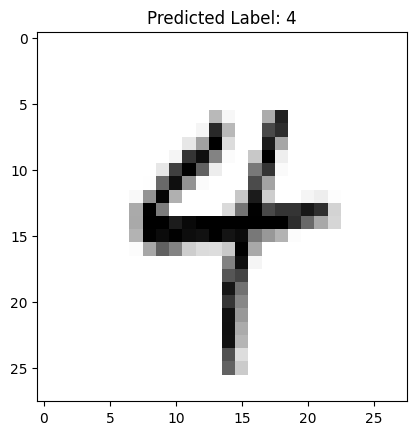

In [27]:
# Fazer a predição
predictions = model.predict(random_image_reshaped)
predicted_label = np.argmax(predictions)

# Mostrar a imagem e a predição
plt.figure()
plt.imshow(random_image.reshape(28, 28), cmap=plt.cm.binary)
plt.title(f'Predicted Label: {predicted_label}')
plt.show()